In [1]:
%matplotlib inline

In [2]:
from grale.all_nb import *
from astropy.io import fits
from astropy import wcs

Set 'threads' as default renderer for lensplane and mass density
Set default angular unit in plotting to arcsec
Set feedback style to 'notebook'


In [3]:
cosm = cosmology.Cosmology(0.7, 0.3, 0, 0.7)
cosmology.setDefaultCosmology(cosm)
D = cosm.getAngularDiameterDistance

zd = 0.375

In [4]:
alphax = fits.open("hlsp_frontier_model_abell370_diego_v4.1_x-arcsec-deflect.fits")[0]
alphay = fits.open("hlsp_frontier_model_abell370_diego_v4.1_y-arcsec-deflect.fits")[0]

In [5]:
w = wcs.WCS(alphax.header)
numY, numX = alphax.data.shape

numY, numX

(512, 512)

In [6]:
ctrDeg = (np.array(w.all_pix2world(0, 0, 0)) + np.array(w.all_pix2world(numX, numY, 0)))/2

In [7]:
corner1 = np.array(w.all_pix2world(0, 0, 0))
corner1 = images.centerOnPosition(corner1*ANGLE_DEGREE, ctrDeg*ANGLE_DEGREE)
corner2 = np.array(w.all_pix2world(numX, numY, 0))
corner2 = images.centerOnPosition(corner2*ANGLE_DEGREE, ctrDeg*ANGLE_DEGREE)

corner1/ANGLE_ARCSEC, corner2/ANGLE_ARCSEC, (corner1-corner2)/ANGLE_ARCSEC

(array([ 107.9984324 , -108.00075721]),
 array([-108.00153572,  107.99920552]),
 array([ 215.99996812, -215.99996273]))

In [8]:
angles = np.empty((numY,numX,2), dtype=np.double)
angles[:,:,0] = -alphax.data*ANGLE_ARCSEC
angles[:,:,1] = alphay.data*ANGLE_ARCSEC

In [9]:
model = lenses.DeflectionGridLens(D(zd), { 
    "angles": angles, 
    "bottomleft": corner1,
    "topright": corner2
})

sigmaCrit = model.getCriticalDensity(1,1)

In [10]:
li = plotutil.LensInfo(model, size=200*ANGLE_ARCSEC, zd=zd)

Text(value='')

FloatProgress(value=0.0)

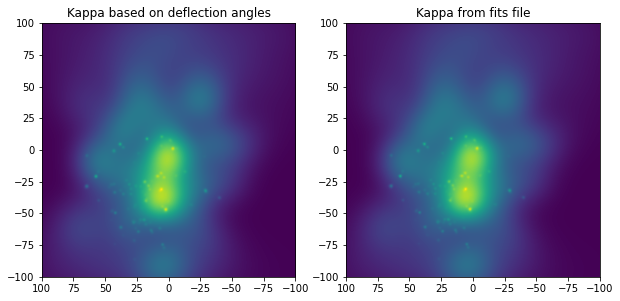

/home/jori/anaconda3-202002/envs/grale2env202002/lib/python3.8/site-packages/IPython/core/display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [11]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plotutil.plotDensity(li, densityUnit=sigmaCrit)
plt.gca().invert_xaxis()
plt.title("Kappa based on deflection angles")
plt.subplot(1,2,2)
plt.imshow(fits.open("hlsp_frontier_model_abell370_diego_v4.1_kappa.fits")[0].data, extent=[108,-108,108,-108])
plt.gca().invert_yaxis()
plt.gca().set_xlim(left=100, right=-100)
plt.gca().set_ylim(top=100, bottom=-100)
plt.title("Kappa from fits file")
plt.show()
plotutil.plotDensityInteractive(li, densityUnit=sigmaCrit, flipX=True)